In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("sales_data.csv")

In [5]:
print(df)

            売上日  商品名  数量    単価 売上担当者
0    2023-01-01  商品A  19  2801  担当者2
1    2023-01-02  商品B  31  1616  担当者1
2    2023-01-03  商品A  15  2833  担当者2
3    2023-01-04  商品B  86  4676  担当者3
4    2023-01-05  商品B  96  2026  担当者1
..          ...  ...  ..   ...   ...
726  2024-12-27  商品C  61  2484  担当者3
727  2024-12-28  商品A  82  1144  担当者2
728  2024-12-29  商品B  71  3344  担当者1
729  2024-12-30  商品C  79  4589  担当者1
730  2024-12-31  商品A  89  2651  担当者3

[731 rows x 5 columns]


In [10]:
# 売上金額の計算
df["売上金額"] = df["数量"] * df["単価"]

# 先頭5行を表示
df.head()

,売上日,商品名,数量,単価,売上担当者,売上金額
0,2023-01-01,商品A,19,2801,担当者2,53219
1,2023-01-02,商品B,31,1616,担当者1,50096
2,2023-01-03,商品A,15,2833,担当者2,42495
3,2023-01-04,商品B,86,4676,担当者3,402136
4,2023-01-05,商品B,96,2026,担当者1,194496


In [11]:
# 売上金額の基本統計量
df["売上金額"].describe()

count       731.000000
mean     151139.485636
std      105082.378269
min        1938.000000
25%       66710.500000
50%      128723.000000
75%      218102.500000
max      482866.000000
Name: 売上金額, dtype: float64

/var/folders/vp/1s2n2bw54fs726knw89jw3xc0000gn/T/ipykernel_67700/930971866.py:11: UserWarning: Glyph 26085 (\N{CJK UNIFIED IDEOGRAPH-65E5}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/vp/1s2n2bw54fs726knw89jw3xc0000gn/T/ipykernel_67700/930971866.py:11: UserWarning: Glyph 20184 (\N{CJK UNIFIED IDEOGRAPH-4ED8}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/vp/1s2n2bw54fs726knw89jw3xc0000gn/T/ipykernel_67700/930971866.py:11: UserWarning: Glyph 22770 (\N{CJK UNIFIED IDEOGRAPH-58F2}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/vp/1s2n2bw54fs726knw89jw3xc0000gn/T/ipykernel_67700/930971866.py:11: UserWarning: Glyph 19978 (\N{CJK UNIFIED IDEOGRAPH-4E0A}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/vp/1s2n2bw54fs726knw89jw3xc0000gn/T/ipykernel_67700/930971866.py:11: UserWarning: Glyph 37329 (\N{CJK UNIFIED IDEOGRAPH-91D1}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/vp/1s2n2bw54

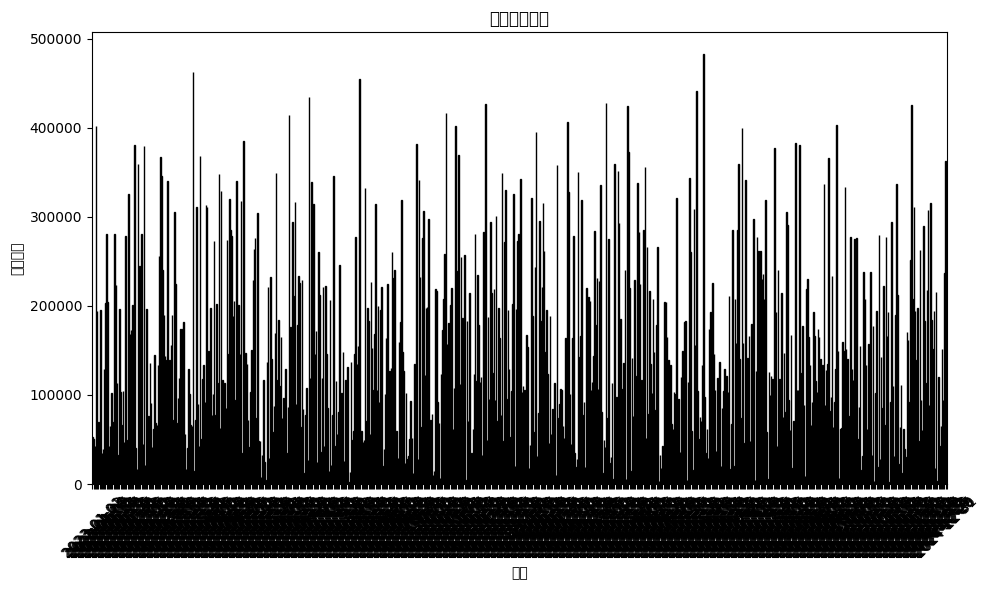

In [13]:
# 日別売上合計を計算
daily_sales = df.groupby("売上日")["売上金額"].sum()

# グラフ描画
plt.figure(figsize=(10, 6))
daily_sales.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("日別売上合計")
plt.xlabel("日付")
plt.ylabel("売上金額")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

最も売れた商品: 商品B(売上 39961039円)


/var/folders/vp/1s2n2bw54fs726knw89jw3xc0000gn/T/ipykernel_67700/158533263.py:18: UserWarning: Glyph 21830 (\N{CJK UNIFIED IDEOGRAPH-5546}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/vp/1s2n2bw54fs726knw89jw3xc0000gn/T/ipykernel_67700/158533263.py:18: UserWarning: Glyph 21697 (\N{CJK UNIFIED IDEOGRAPH-54C1}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/vp/1s2n2bw54fs726knw89jw3xc0000gn/T/ipykernel_67700/158533263.py:18: UserWarning: Glyph 21517 (\N{CJK UNIFIED IDEOGRAPH-540D}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/vp/1s2n2bw54fs726knw89jw3xc0000gn/T/ipykernel_67700/158533263.py:18: UserWarning: Glyph 22770 (\N{CJK UNIFIED IDEOGRAPH-58F2}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/vp/1s2n2bw54fs726knw89jw3xc0000gn/T/ipykernel_67700/158533263.py:18: UserWarning: Glyph 19978 (\N{CJK UNIFIED IDEOGRAPH-4E0A}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/vp/1s2n2bw54

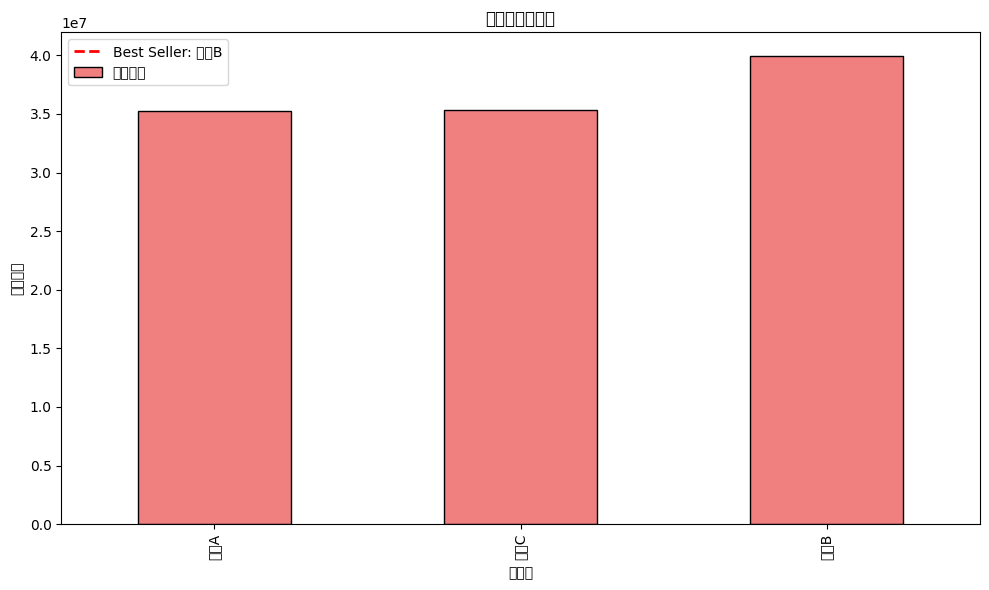

In [16]:
# 商品ごとの売上金額合計
sales_by_product = df.groupby("商品名")["売上金額"].sum()

# 最大売上商
best_product = sales_by_product.idxmax()
best_sales = sales_by_product.max()

print(f"最も売れた商品: {best_product}(売上 {best_sales}円)")

# 商品売上の棒グラフ
plt.figure(figsize=(10, 6))
sales_by_product.sort_values().plot(kind="bar", color="lightcoral", edgecolor="black")
plt.axvline(best_sales, color="red", linestyle="dashed", linewidth=2, label=f"Best Seller: {best_product}")
plt.title("商品別売上合計")
plt.xlabel("商品名")
plt.ylabel("売上金額")
plt.legend()
plt.tight_layout()
plt.show()

In [17]:
# IQR（四分位範囲）を計算
Q1 = df["売上金額"].quantile(0.25)
Q3 = df["売上金額"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 異常値を抽出
outliers = df[(df["売上金額"] < lower_bound) | (df["売上金額"] > upper_bound)]
outliers

,売上日,商品名,数量,単価,売上担当者,売上金額
86,2023-03-28,商品B,94,4926,担当者1,463044
228,2023-08-17,商品C,99,4588,担当者2,454212
522,2024-06-06,商品C,97,4978,担当者3,482866


In [18]:
# 売上分析結果をCSVで保存
df.to_csv("sales_analysis_result.csv", index=False)
print("分析結果を 'sales_analysis_result.csv' に保存しました。")

分析結果を 'sales_analysis_result.csv' に保存しました。
